In [2]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [3]:
microarray_data_pattern = './tgd2024_jun20_avg_scan_stats_microarray/**/*.csv'

rna_seq_data_pattern = './tgd2024_jun20_avg_scan_stats_rna_seq/**/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern)

rna_seq_stats_files = glob.glob(rna_seq_data_pattern)

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

In [4]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [5]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [6]:
rna_seq_stats_df.shape, microarray_stats_df.shape

((1320, 34), (1260, 34))

-0.036955034401178505 0.20011026646407337
2.1990927488458393e-06 2.1434226464539134e-06
150 150
T-statistic: -74.8248086944662, P-value: 3.255053915496891e-195
Z-score: 2.0031334060469015, P-value: 0.04516297118614787


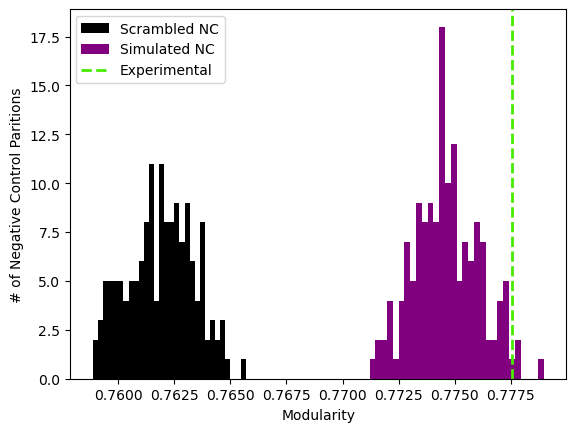

0.03402068245960855 -0.14268685644041595
2.174796044638173e-06 2.2424269466611173e-06
150 150
T-statistic: -31.08783346752311, P-value: 1.5742935814795325e-95
Z-score: 70.54302114911185, P-value: 0.0


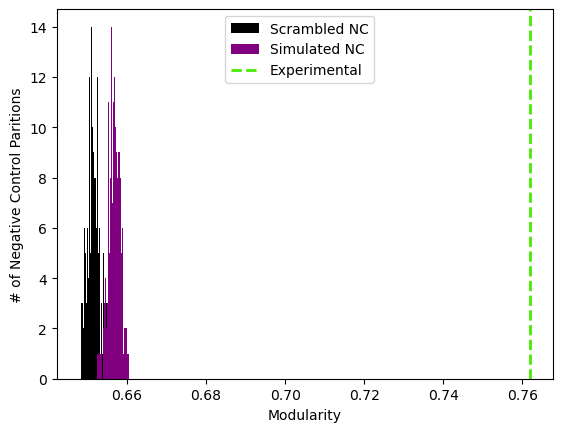

In [60]:
import statistics

dfs = {'rna_seq': rna_seq_stats_df, 'microarray': microarray_stats_df}

for name, df_stats in dfs.items():

    df_stats_exp = df_stats.loc[
        (df_stats['partition_type'] == 'EXP')
        &
        (df_stats['metric'] == 'manhattan')
        &
        (df_stats['nns'] == 3)
        &
        (df_stats['parameter'] == 0.005)
                                ]
    
    df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
    df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']
    # hist_clustering_metric = 'silhouette_score'
    hist_clustering_metric = 'modularity'

    hist_data = np.random.choice(list(df_stats_nc[hist_clustering_metric].values), 150, replace=False) 
    hist_data
    hist_data_tnc = np.random.choice(list(df_stats_tnc[hist_clustering_metric].values), 150, replace=False) 
    hist_data_tnc
    exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
    exp_line_at_x
    # tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
    # tnc_line_at_x

    print(stats.skew(hist_data), stats.skew(hist_data_tnc))

    print(statistics.variance(hist_data), statistics.variance(hist_data_tnc))
    print(len(hist_data), len(hist_data_tnc))

    # Create the histogram
    plt.hist(hist_data, bins=30, color='black', label='Scrambled NC')
    plt.hist(hist_data_tnc, bins=30, color='purple', label='Simulated NC')

    t_stat, p_value = stats.ttest_ind(hist_data, hist_data_tnc)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Calculate z-score
    z_score = (exp_line_at_x - np.mean(hist_data_tnc)) / np.std(hist_data_tnc)
    # Calculate p-value for a two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print(f"Z-score: {z_score}, P-value: {p_value}")

    # Add a vertical line at the specified x value
    # plt.axvline(x=exp_line_at_x, color='red', linestyle='dashed', linewidth=2, label='EXP at x={} ($P$ < 0.001)'.format(round(exp_line_at_x, 2)))
    # plt.axvline(x=tnc_line_at_x, color='blue', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))
    plt.axvline(x=exp_line_at_x, color='#47EA00', linestyle='dashed', linewidth=2, label='Experimental')
    # plt.axvline(x=tnc_line_at_x, color='purple', linestyle='dashed', linewidth=2, label='TNC')


    # Add labels and title
    plt.xlabel(hist_clustering_metric.capitalize())
    plt.ylabel('# of Negative Control Paritions')
    # plt.title(f'{len(hist_data)} Neg. Controls vs. Experimental {hist_clustering_metric.capitalize()} Distribution')

    plt.legend(bbox_to_anchor=(0.325, 1))

    plt.savefig(f'{name}_mod_plot.svg', format='svg')

    plt.show()

In [12]:
df_stats_nc['silhouette_score'].mean()

-0.049233497867172855

In [13]:
df_stats_nc['silhouette_score'].median()

-0.049320999743927146

In [8]:
df_stats_nc['silhouette_score'].max()

-0.0413570981948457

In [9]:
df_stats_nc['modularity'].mean()

0.761902643051567

In [10]:
df_stats_nc['modularity'].median()

0.7619081510482628

In [11]:
df_stats_nc['modularity'].max()

0.7656842579658358

In [12]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

(0.761902643051567, 0.0014846697585125144, 8.172838036505913e-05)

In [13]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

(191.5303441954628, 329)

In [14]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

0.0

In [15]:
p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)
p_value

0.0

In [16]:
alpha = 0.05
alpha

0.05

In [17]:
p_value < alpha

True